In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def wrangle(filepath):
    
    #Import into csv
    df = pd.read_csv(filepath)
    
    # Convert price to float from object
    df["Price"]   = (df["Price"]
                   .str.replace(",", "" )
                   .str.replace("/year", "")
                   .str.replace("/day", "")
                   .str.replace("/month", "")
                   .str.replace("/sqm", "")
                   .astype(float)
                   )
    
    # Remove outliers from rent prices
    low,high =df["Price"].quantile([0.05, 0.85])
    mask_price = df["Price"].between(low, high)
    
    
    df = df[mask_price]
    
    return df  

In [6]:
df = wrangle("data/lagos-rent.csv")

In [7]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000.0,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000.0,1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [5]:
# statistical details of price
df["Price"].describe()

count    4.335700e+04
mean     2.332608e+06
std      1.739454e+06
min      4.000000e+05
25%      9.000000e+05
50%      1.700000e+06
75%      3.500000e+06
max      7.000000e+06
Name: Price, dtype: float64

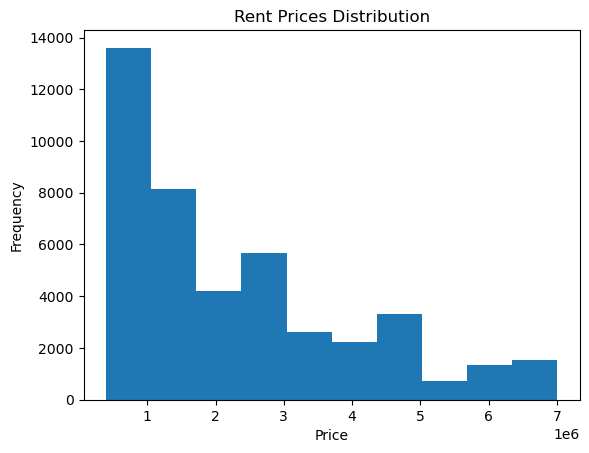

In [6]:
# Plot histogram to see price distribution
plt.hist(df["Price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Rent Prices Distribution");

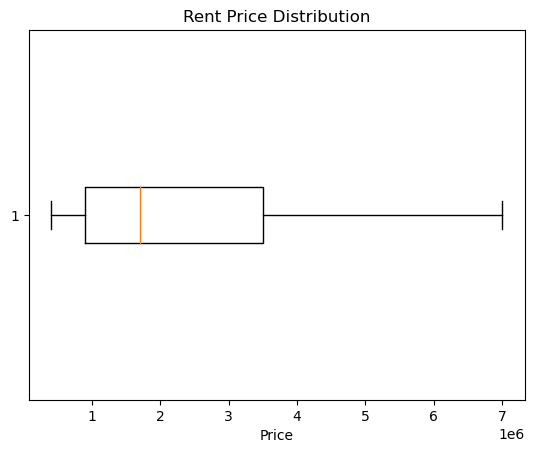

In [7]:
# Plot boxplot of rent prices
plt.boxplot(df["Price"], vert=False)
plt.xlabel("Price"),
plt.title("Rent Price Distribution");

In [8]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000.0,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000.0,1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [9]:
# Subset data into four bedroom rent only
df_fourbedroom_rent =df[df["More Info"] == "4 BEDROOM HOUSE FOR RENT"]
df_fourbedroom_rent.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000.0,1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron
9,4 Bedroom Semi Detached Duplex For Rent,4 BEDROOM HOUSE FOR RENT,5000000.0,0,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron
10,4 Bedroom Semi Detached Duplex With A Bqfor Rent,4 BEDROOM HOUSE FOR RENT,6000000.0,0,1,0,4 beds,5 baths,5 Toilets,Lekki,Osapa London


In [10]:
# Group fourbedroom flat rent according to city
city_fourbedroom_rent_meanprices = df_fourbedroom_rent.groupby("City")["Price"].mean().sort_values(ascending=False)
city_fourbedroom_rent_meanprices

City
Ikoyi       6.151786e+06
Island      5.347761e+06
Lekki       4.836287e+06
Ikeja       4.696471e+06
Surulere    3.816364e+06
Gbagada     3.720370e+06
Yaba        3.387500e+06
Ojodu       3.215608e+06
Ajah        3.109091e+06
Name: Price, dtype: float64

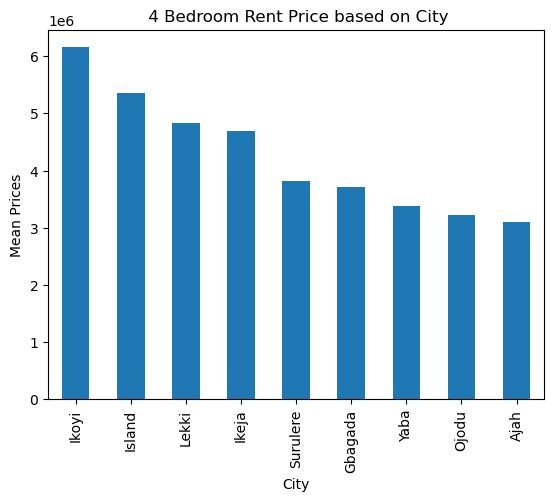

In [11]:
# Plot a bar chart to show fourbedroom rent prices according to cities
city_fourbedroom_rent_meanprices.plot(
    kind="bar",
    xlabel="City",
    ylabel="Mean Prices",
    title=" 4 Bedroom Rent Price based on City",
);

In [12]:
# Subset data into three bedroom rent only
df_threebedroom_rent=df[df["More Info"] == "3 BEDROOM HOUSE FOR RENT"]
df_threebedroom_rent.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
5,3 Bedroom Terrace Duplex Houses,3 BEDROOM HOUSE FOR RENT,3500000.0,1,1,0,3 beds,3 baths,4 Toilets,Lekki,Chevron
12,3bedroom Apartment For Rent,3 BEDROOM HOUSE FOR RENT,3000000.0,1,1,0,3 beds,4 baths,4 Toilets,Lekki,Chevron
18,3 Bedroom Terrace Duplex,3 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,3 beds,3 baths,4 Toilets,Lekki,Ikota
39,3 Bedroom Semi Detached Duplex,3 BEDROOM HOUSE FOR RENT,3200000.0,0,1,0,3 beds,3 baths,4 Toilets,Lekki,Ikota
45,3 Bedroom Terrace Duplex,3 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,3 beds,3 baths,4 Toilets,Lekki,Ikate


In [13]:
# Group threebedroom flat rent according to city
city_threebedroom_rent_meanprices=df_threebedroom_rent.groupby("City")["Price"].mean().sort_values(ascending=False)
city_threebedroom_rent_meanprices

City
Ikoyi       6.037778e+06
Island      5.183722e+06
Lekki       3.710082e+06
Ikeja       2.759576e+06
Gbagada     2.527228e+06
Yaba        2.126316e+06
Ajah        2.050657e+06
Ojodu       1.891165e+06
Surulere    1.821519e+06
Name: Price, dtype: float64

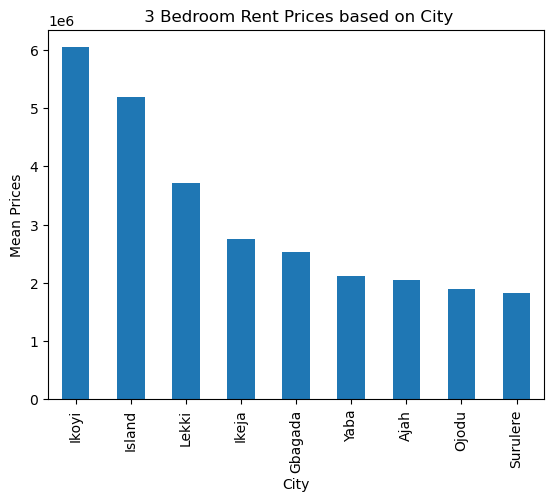

In [14]:
# Plot a bar chart to show threebedroom rent prices according to cities
city_threebedroom_rent_meanprices.plot(
    kind="bar",
    xlabel="City",
    ylabel="Mean Prices",
    title=" 3 Bedroom Rent Prices based on City",
);

In [15]:
# Subset data into two bedroom rent only
df_twobedroom_rent =df[df["More Info"] == "2 BEDROOM HOUSE FOR RENT"]
df_twobedroom_rent.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000.0,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
16,2 Bedroom Maisonette,2 BEDROOM HOUSE FOR RENT,5000000.0,1,1,0,2 beds,2 baths,3 Toilets,Lekki,Ikate
113,Serviced 2 Bedroom Terrace Duplex,2 BEDROOM HOUSE FOR RENT,4500000.0,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ikate
120,Brand New 2 Bedroom Apartment,2 BEDROOM HOUSE FOR RENT,3000000.0,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Chevron


In [16]:
 #Group twobedroom flat rent according to city
city_twobedroom_rent_meanprices =df_twobedroom_rent.groupby("City")["Price"].mean().sort_values(ascending=False)
city_twobedroom_rent_meanprices 

City
Ikoyi       5.105263e+06
Island      4.355556e+06
Lekki       2.873300e+06
Ikeja       1.710000e+06
Yaba        1.662963e+06
Ajah        1.484271e+06
Gbagada     1.400000e+06
Surulere    1.278409e+06
Ojodu       1.262235e+06
Name: Price, dtype: float64

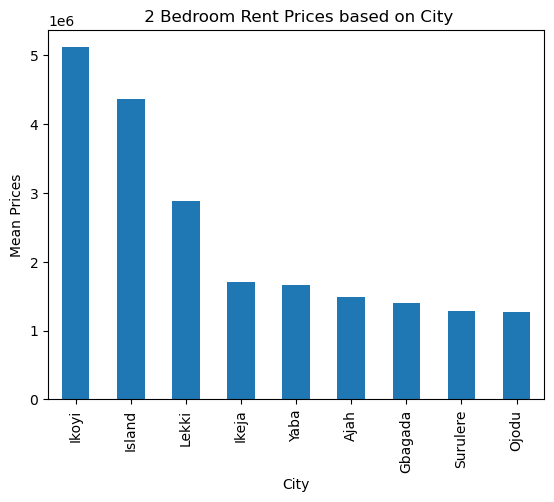

In [17]:
# Plot a bar chart to show twobedroom rent prices according to cities
city_twobedroom_rent_meanprices.plot(
    kind="bar",
    xlabel="City",
    ylabel="Mean Prices",
    title=" 2 Bedroom Rent Prices based on City",
);

In [18]:
# Subset data into two bedroom rent only 
df_onebedroom_rent= df[df["More Info"] == "1 BEDROOM HOUSE FOR RENT"]
df_onebedroom_rent.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
307,Shared Apartment,1 BEDROOM HOUSE FOR RENT,1000000.0,1,1,0,1 beds,1 baths,1 Toilets,Lekki,Ikota
309,Shared Apartment,1 BEDROOM HOUSE FOR RENT,1300000.0,1,1,0,1 beds,1 baths,1 Toilets,Lekki,Ikate
310,Boys Quarter,1 BEDROOM HOUSE FOR RENT,700000.0,0,0,0,1 beds,1 baths,1 Toilets,Lekki,Ikate
1118,1 Bedroom Flat,1 BEDROOM HOUSE FOR RENT,2000000.0,0,1,0,1 beds,2 baths,2 Toilets,Lekki,Other Lekki
1832,Self Contain,1 BEDROOM HOUSE FOR RENT,700000.0,0,0,0,1 beds,1 baths,1 Toilets,Lekki,Other Lekki


In [19]:
#Group one bedroom flat rent according to city
city_onebedroom_rent_meanprices = df_onebedroom_rent.groupby("City")["Price"].mean().sort_values(ascending=False)
city_onebedroom_rent_meanprices

City
Ikoyi       7.000000e+06
Island      2.660000e+06
Lekki       1.331655e+06
Ikeja       1.110000e+06
Yaba        9.300000e+05
Ojodu       8.041667e+05
Ajah        8.008746e+05
Gbagada     7.625000e+05
Surulere    7.062506e+05
Name: Price, dtype: float64

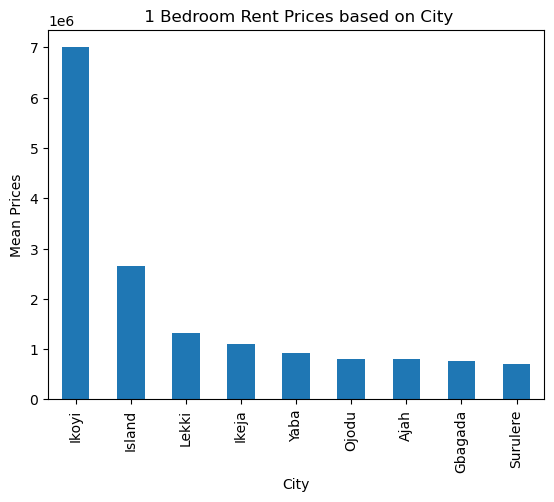

In [20]:
# Plot a bar chart to show onebedroom rent prices according to cities
city_onebedroom_rent_meanprices.plot(
    kind="bar",
    xlabel="City",
    ylabel="Mean Prices",
    title=" 1 Bedroom Rent Prices based on City",
);

In [21]:
df.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000.0,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000.0,1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [22]:
#Subset data in to properties for rent in Ikoyi only
df_Ikoyi = df[df["City"] == "Ikoyi"]


In [23]:
# Subset data into four bedroom rent in Ikoyi
fourbedroom_df_Ikoyi = df_Ikoyi[df_Ikoyi["More Info"] == "4 BEDROOM HOUSE FOR RENT"] 
fourbedroom_df_Ikoyi.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
19218,4 Bedroom Terrace Duplex,4 BEDROOM HOUSE FOR RENT,7000000.0,1,1,0,4 beds,4 baths,5 Toilets,Ikoyi,Other Ikoyi
19323,4 Bedroom Terrace Duplex,4 BEDROOM HOUSE FOR RENT,7000000.0,1,0,0,4 beds,5 baths,5 Toilets,Ikoyi,Dolphin Estate
19390,4 Bedroom Semi Detached Terrace House,4 BEDROOM HOUSE FOR RENT,7000000.0,1,0,0,4 beds,4 baths,5 Toilets,Ikoyi,Parkview Estate
19491,4 Bedroom Terrace House,4 BEDROOM HOUSE FOR RENT,6000000.0,1,1,1,4 beds,4 baths,5 Toilets,Ikoyi,Parkview Estate
19492,4 Bedroom Terrace House (no Bq) @n6.5m,4 BEDROOM HOUSE FOR RENT,6500000.0,0,1,0,4 beds,4 baths,5 Toilets,Ikoyi,Other Ikoyi


In [24]:
# Group data into fourbedroom rent in Ikoyi neighborhood
fourbedroom_df_Ikoyi_neighborhood = fourbedroom_df_Ikoyi.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)
fourbedroom_df_Ikoyi_neighborhood.head()

Neighborhood
Parkview Estate             6.421053e+06
Other Ikoyi                 6.233333e+06
Dolphin Estate              6.000000e+06
Osborne Foreshore Estate    6.000000e+06
Old Ikoyi                   5.857143e+06
Name: Price, dtype: float64

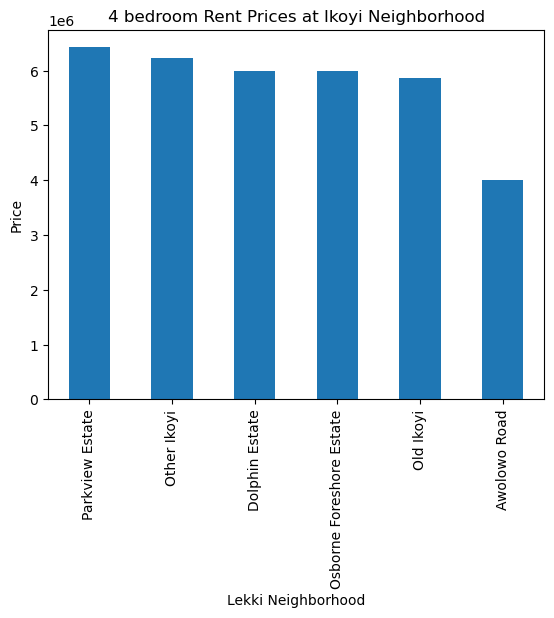

In [25]:
# Plot a bar chart to show four bedroom rent prices in Ikoyi Neighborhood
fourbedroom_df_Ikoyi_neighborhood.plot(
    kind="bar",
    xlabel="Lekki Neighborhood",
    ylabel="Price",
    title= "4 bedroom Rent Prices at Ikoyi Neighborhood"
);

In [26]:
#Subset data in to properties for rent in Island only
df_Island = df[df["City"] == "Island"]
df_Island.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
27048,Newly Renovated 5 Bedroom Fully Detached Duplex,5 BEDROOM HOUSE FOR RENT,7000000.0,0,0,0,5 beds,5 baths,6 Toilets,Island,Oniru
27049,Spacious 3 Bedroom Apartment,3 BEDROOM FLAT / APARTMENT FOR RENT,6500000.0,1,0,0,3 beds,3 baths,4 Toilets,Island,Oniru
27066,Beautiful Two Bed Apartment,FLAT / APARTMENT FOR RENT,5000000.0,1,0,1,beds,baths,Toilets,Island,1004
27073,3 Bedroom Flat,3 BEDROOM FLAT / APARTMENT FOR RENT,7000000.0,0,0,0,3 beds,3 baths,3 Toilets,Island,Other Victoria Island
27077,4 Bedroom Terrace House,4 BEDROOM HOUSE FOR RENT,5500000.0,1,0,0,4 beds,3 baths,4 Toilets,Island,Other Victoria Island


In [27]:
# Subset data into four bedroom rent in Island
fourbedroom_df_Island = df_Island[df_Island["More Info"] == "4 BEDROOM HOUSE FOR RENT"]
fourbedroom_df_Island.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
27077,4 Bedroom Terrace House,4 BEDROOM HOUSE FOR RENT,5500000.0,1,0,0,4 beds,3 baths,4 Toilets,Island,Other Victoria Island
27091,4 Bedroom Terraced Duplex,4 BEDROOM HOUSE FOR RENT,5500000.0,1,0,0,4 beds,4 baths,5 Toilets,Island,Oniru
27263,4 Bedroom Semi Detached Duplex,4 BEDROOM HOUSE FOR RENT,7000000.0,0,0,0,4 beds,0 baths,0 Toilets,Island,Oniru
27265,Clean 4 Bedroom Duplex,4 BEDROOM HOUSE FOR RENT,7000000.0,0,0,0,4 beds,4 baths,5 Toilets,Island,Oniru
27281,3 Bedroom Apartment,4 BEDROOM HOUSE FOR RENT,4500000.0,0,0,0,4 beds,5 baths,5 Toilets,Island,Oniru


In [28]:
# Group data into fourbedroom rent in Island neighborhood
fourbedroom_df_Island_neighborhood = fourbedroom_df_Island.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)
fourbedroom_df_Island_neighborhood

Neighborhood
Oniru                        5.445283e+06
Other Victoria Island        5.018182e+06
1004                         5.000000e+06
Ligali Ayorinde              5.000000e+06
Victoria Island Extension    4.500000e+06
Name: Price, dtype: float64

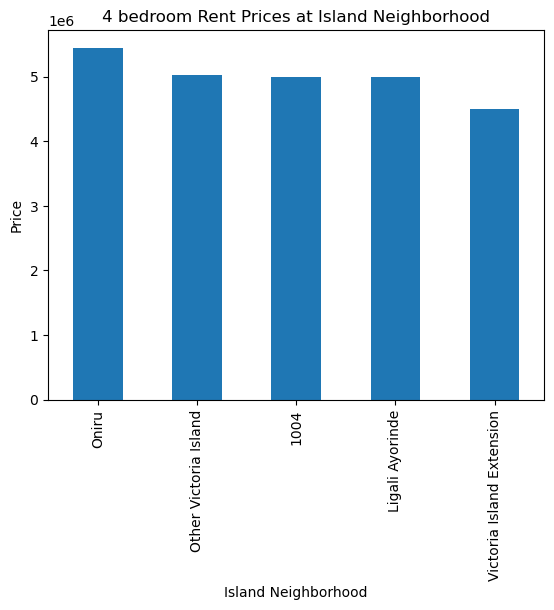

In [29]:
# Plot a bar chart to show four bedroom rent prices in Island Neighborhood
fourbedroom_df_Island_neighborhood.plot(
 kind="bar",
    xlabel="Island Neighborhood",
    ylabel="Price",
    title= "4 bedroom Rent Prices at Island Neighborhood"
);   

In [30]:
#Subset data in to properties for rent in Lekki
df_lekki=df[df["City"] == "Lekki"]
df_lekki.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
0,Newly Built 4 Bedroom Semi Detached House With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Agungi
1,Superb 4 Bedroom Semi Detached Duplex With Bq,4 BEDROOM HOUSE FOR RENT,5000000.0,0,1,0,4 beds,4 baths,5 Toilets,Lekki,Other Lekki
2,Furnished 2 Bedroom Terrace Duplex For Rent !!!,2 BEDROOM HOUSE FOR RENT,3500000.0,1,0,0,2 beds,3 baths,3 Toilets,Lekki,Osapa London
3,2 Bedroom Apartment For Rent,2 BEDROOM HOUSE FOR RENT,2700000.0,1,1,0,2 beds,3 baths,3 Toilets,Lekki,Ologolo
4,4 Bedroom Terrace Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4000000.0,1,0,0,4 beds,5 baths,5 Toilets,Lekki,Chevron


In [31]:
# Subset data into four bedroom rent in Lekki
fourbedroom_df_lekki = df_lekki[df_lekki["More Info"] == "4 BEDROOM HOUSE FOR RENT"]
fourbedroom_df_lekki["More Info"].unique()

array(['4 BEDROOM HOUSE FOR RENT'], dtype=object)

In [32]:
# Group data into fourbedroom rent in Lekki neighborhood
fourbedroom_df_lekki_neighborhood = fourbedroom_df_lekki.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)
fourbedroom_df_lekki_neighborhood

Neighborhood
Lekki Phase 1    5.721961e+06
Ikate            5.584507e+06
Osapa London     5.162838e+06
Agungi           4.914493e+06
Ologolo          4.851908e+06
Chevron          4.619369e+06
Ikota            4.412702e+06
Other Lekki      4.397505e+06
Name: Price, dtype: float64

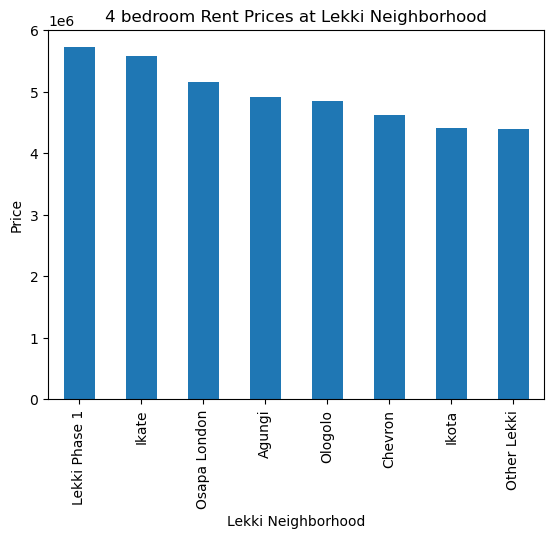

In [33]:
# Plot a bar chart to show four bedroom rent prices in Lekki Neighborhood
fourbedroom_df_lekki_neighborhood.plot(
    kind="bar",
    xlabel="Lekki Neighborhood",
    ylabel="Price",
    title= "4 bedroom Rent Prices at Lekki Neighborhood"
);

In [34]:
#Subset data in to properties for rent in Ikeja
df_Ikeja=df[df["City"] == "Ikeja"]
df_Ikeja.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
23516,4 Bedrooms Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4500000.0,0,0,0,4 beds,4 baths,5 Toilets,Ikeja,Opebi
23518,Decent 2 Bedroom Flats In Opebi,2 BEDROOM FLAT / APARTMENT FOR RENT,1500000.0,0,0,0,2 beds,baths,Toilets,Ikeja,Opebi
23519,Hotel,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,7000000.0,0,0,0,10 beds,10 baths,10 Toilets,Ikeja,Oregun
23520,Newly Built Executive Finished And Furnished 3...,FLAT / APARTMENT FOR RENT,1800000.0,0,0,0,beds,baths,Toilets,Ikeja,Oregun
23521,New Luxury 5bedroom Detached Duplex In A Gated...,5 BEDROOM HOUSE FOR RENT,7000000.0,0,1,1,5 beds,baths,Toilets,Ikeja,Adeniyi Jones


In [35]:
# Subset data into four bedroom rent in Lekki
fourbedroom_df_lkeja = df_Ikeja[df_Ikeja["More Info"] == "4 BEDROOM HOUSE FOR RENT"]
fourbedroom_df_lkeja.head()

,Title,More Info,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City,Neighborhood
23516,4 Bedrooms Duplex For Rent,4 BEDROOM HOUSE FOR RENT,4500000.0,0,0,0,4 beds,4 baths,5 Toilets,Ikeja,Opebi
23522,4 Bedroom Serviced Terrace Duplex,4 BEDROOM HOUSE FOR RENT,5000000.0,1,0,0,4 beds,4 baths,5 Toilets,Ikeja,Adeniyi Jones
23524,Executive 4 Bedroom Terrace House,4 BEDROOM HOUSE FOR RENT,5000000.0,0,0,0,4 beds,0 baths,0 Toilets,Ikeja,Adeniyi Jones
23529,4 Bedroom Terrace House,4 BEDROOM HOUSE FOR RENT,5000000.0,0,0,0,4 beds,0 baths,0 Toilets,Ikeja,Adeniyi Jones
23537,Luxury 4 Bedroom Terrace Duplex,4 BEDROOM HOUSE FOR RENT,3500000.0,0,0,1,4 beds,0 baths,0 Toilets,Ikeja,Other Ikeja


In [36]:
# Group data into fourbedroom rent in Ikeja neighborhood
fourbedroom_df_Ikeja_neighborhood = fourbedroom_df_lkeja.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)
fourbedroom_df_Ikeja_neighborhood

Neighborhood
GRA              5.660000e+06
Allen Avenue     5.582609e+06
Adeniyi Jones    4.698276e+06
alausa           4.583333e+06
Opebi            4.218750e+06
Other Ikeja      4.109091e+06
Toyin street     4.000000e+06
Oregun           3.881818e+06
Awolowo way      3.000000e+06
Name: Price, dtype: float64

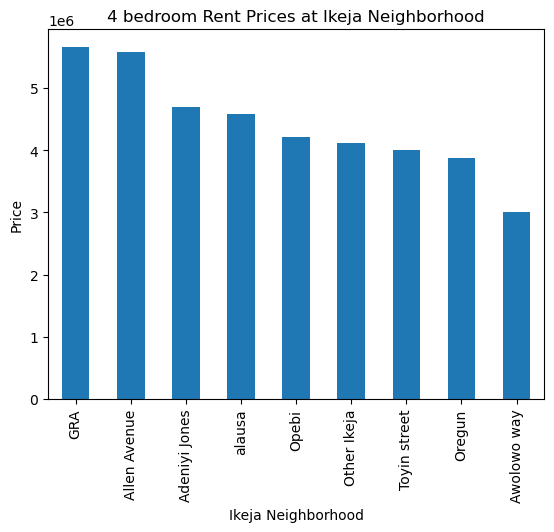

In [37]:
# Plot a bar chart to show four bedroom rent prices in Ikeja Neighborhood
fourbedroom_df_Ikeja_neighborhood.plot(
    kind="bar",
    xlabel="Ikeja Neighborhood",
    ylabel="Price",
    title= "4 bedroom Rent Prices at Ikeja Neighborhood"
);

Text(0.5, 1.0, '4 bedroom Rent Prices at Ikeja Neighborhood')

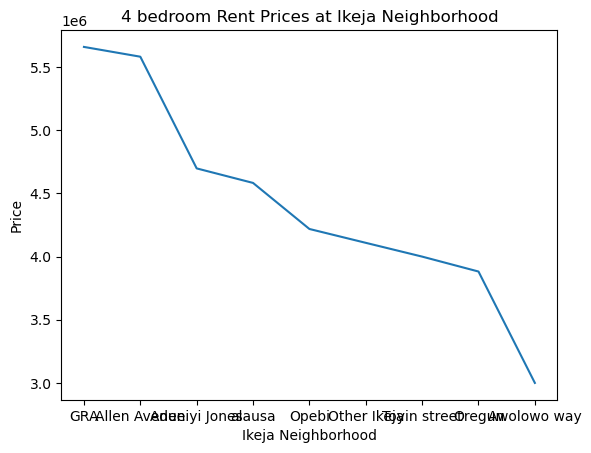

In [42]:
plt.plot(fourbedroom_df_Ikeja_neighborhood)
plt.xlabel("Ikeja Neighborhood")
plt.ylabel("Price")
plt.title("4 bedroom Rent Prices at Ikeja Neighborhood")